### 1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

In [728]:
import matplotlib.pyplot as plt
import cv2 as cv2
import skimage

In [842]:
img = cv2.imread('photo.jpg')

In [843]:
b,g,r = cv2.split(img)

In [844]:
cv2.imwrite('blue_channel.jpg', b)

True

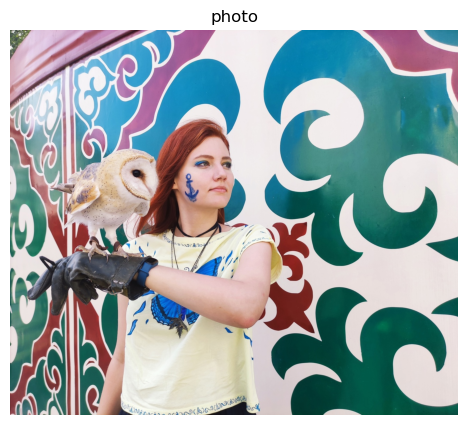

голубой [[ 65  66  70 ... 144 143 142]
 [ 74  65  75 ... 147 146 146]
 [ 72  80  86 ... 144 144 145]
 ...
 [ 88  87  97 ...  62  62  62]
 [ 92 114 181 ...  61  60  60]
 [121 179 207 ...  61  59  60]]
зеленый [[ 95  94  93 ... 122 121 120]
 [104  92  98 ... 125 124 124]
 [102 107 109 ... 124 124 125]
 ...
 [ 80  80  92 ...  76  76  76]
 [ 84 108 177 ...  75  77  77]
 [115 174 203 ...  75  76  77]]
красный [[ 76  75  79 ...  34  33  32]
 [ 85  76  84 ...  37  36  36]
 [ 83  91  95 ...  36  36  37]
 ...
 [140 137 143 ...  10  10  10]
 [137 157 218 ...   9  10  10]
 [164 219 238 ...   9   9  10]]
(1100, 1280)
[ 65  66  70 ... 144 143 142]


In [845]:
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()
    print('голубой', b)
    print('зеленый', g)
    print('красный', r)
    print(b.shape)
    print(b[0])
     
    
b = draw_picture(img, 'photo')

### 2. Реализуйте три модели кластеризации:

In [733]:
import numpy as np
import pandas as pd

In [846]:
X_rgb = cv2.split(img)
X_rgb

(array([[ 65,  66,  70, ..., 144, 143, 142],
        [ 74,  65,  75, ..., 147, 146, 146],
        [ 72,  80,  86, ..., 144, 144, 145],
        ...,
        [ 88,  87,  97, ...,  62,  62,  62],
        [ 92, 114, 181, ...,  61,  60,  60],
        [121, 179, 207, ...,  61,  59,  60]], dtype=uint8),
 array([[ 95,  94,  93, ..., 122, 121, 120],
        [104,  92,  98, ..., 125, 124, 124],
        [102, 107, 109, ..., 124, 124, 125],
        ...,
        [ 80,  80,  92, ...,  76,  76,  76],
        [ 84, 108, 177, ...,  75,  77,  77],
        [115, 174, 203, ...,  75,  76,  77]], dtype=uint8),
 array([[ 76,  75,  79, ...,  34,  33,  32],
        [ 85,  76,  84, ...,  37,  36,  36],
        [ 83,  91,  95, ...,  36,  36,  37],
        ...,
        [140, 137, 143, ...,  10,  10,  10],
        [137, 157, 218, ...,   9,  10,  10],
        [164, 219, 238, ...,   9,   9,  10]], dtype=uint8))

In [847]:
X_rgb[0].shape #1100 строк, 1280 значений в каждой строке

(1100, 1280)

In [848]:
X_rgb[0]

array([[ 65,  66,  70, ..., 144, 143, 142],
       [ 74,  65,  75, ..., 147, 146, 146],
       [ 72,  80,  86, ..., 144, 144, 145],
       ...,
       [ 88,  87,  97, ...,  62,  62,  62],
       [ 92, 114, 181, ...,  61,  60,  60],
       [121, 179, 207, ...,  61,  59,  60]], dtype=uint8)

In [849]:
blue = np.array([])
blue

array([], dtype=float64)

In [850]:
for i in X_rgb[0]:
    blue = np.append(blue, i)
print(blue)

[65. 66. 70. ... 61. 59. 60.]


In [851]:
blue = blue.transpose()
blue

array([65., 66., 70., ..., 61., 59., 60.])

In [852]:
green = np.array([])
green

array([], dtype=float64)

In [853]:
for i in X_rgb[1]:
    green = np.append(green, i)
print(green)

[95. 94. 93. ... 75. 76. 77.]


In [854]:
red = np.array([])
red

array([], dtype=float64)

In [855]:
for i in X_rgb[2]:
    red = np.append(red, i)
print(red)

[76. 75. 79. ...  9.  9. 10.]


In [856]:
X = np.row_stack([blue, green, red]).transpose() #каждый столбец - отдельный цвет
X

array([[65., 95., 76.],
       [66., 94., 75.],
       [70., 93., 79.],
       ...,
       [61., 75.,  9.],
       [59., 76.,  9.],
       [60., 77., 10.]])

###### Обратная отрисовка рисунка

In [857]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [858]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.25490196, 0.37254902, 0.29803922],
       [0.25882353, 0.36862745, 0.29411765],
       [0.2745098 , 0.36470588, 0.30980392],
       ...,
       [0.23921569, 0.29411765, 0.03529412],
       [0.23137255, 0.29803922, 0.03529412],
       [0.23529412, 0.30196078, 0.03921569]])

In [859]:
X[:, 2] #только третий столбец, где красный
#надо сделать обратно 1100 строк по 1280 значений в каждой строке,
#хочу заново картинку нарисовать по тем же координатам

array([0.29803922, 0.29411765, 0.30980392, ..., 0.03529412, 0.03529412,
       0.03921569])

In [861]:
hsplit_ = np.hsplit(X[:,2], 1100) #разделила обратно на 1100 строк по 1280 значений в каждой
hsplit_

[array([0.29803922, 0.29411765, 0.30980392, ..., 0.13333333, 0.12941176,
        0.1254902 ]),
 array([0.33333333, 0.29803922, 0.32941176, ..., 0.14509804, 0.14117647,
        0.14117647]),
 array([0.3254902 , 0.35686275, 0.37254902, ..., 0.14117647, 0.14117647,
        0.14509804]),
 array([0.35686275, 0.36862745, 0.43921569, ..., 0.1372549 , 0.14117647,
        0.14509804]),
 array([0.29803922, 0.35686275, 0.48627451, ..., 0.14117647, 0.14509804,
        0.14509804]),
 array([0.29019608, 0.36470588, 0.43137255, ..., 0.14117647, 0.14509804,
        0.14509804]),
 array([0.32156863, 0.39607843, 0.41176471, ..., 0.14901961, 0.14509804,
        0.14117647]),
 array([0.36862745, 0.37254902, 0.40392157, ..., 0.15686275, 0.15294118,
        0.14901961]),
 array([0.31764706, 0.30980392, 0.32941176, ..., 0.15294118, 0.15294118,
        0.15294118]),
 array([0.30980392, 0.29411765, 0.25490196, ..., 0.16078431, 0.16078431,
        0.16078431]),
 array([0.32156863, 0.29019608, 0.2627451 , ..., 0

In [862]:
len(hsplit_[0]) #проверяю, что в первой строке 1280 значений. Всего строк 1100.

1280

In [863]:
#надо соединить в один двумерный массив вместо 1100 одномерных массивов
red_color = np.array(hsplit_)
red_color

array([[0.29803922, 0.29411765, 0.30980392, ..., 0.13333333, 0.12941176,
        0.1254902 ],
       [0.33333333, 0.29803922, 0.32941176, ..., 0.14509804, 0.14117647,
        0.14117647],
       [0.3254902 , 0.35686275, 0.37254902, ..., 0.14117647, 0.14117647,
        0.14509804],
       ...,
       [0.54901961, 0.5372549 , 0.56078431, ..., 0.03921569, 0.03921569,
        0.03921569],
       [0.5372549 , 0.61568627, 0.85490196, ..., 0.03529412, 0.03921569,
        0.03921569],
       [0.64313725, 0.85882353, 0.93333333, ..., 0.03529412, 0.03529412,
        0.03921569]])

In [864]:
hsplit_ = np.hsplit(X[:,1], 1100) #разделила обратно на 1100 строк по 1280 значений в каждой
hsplit_

[array([0.37254902, 0.36862745, 0.36470588, ..., 0.47843137, 0.4745098 ,
        0.47058824]),
 array([0.40784314, 0.36078431, 0.38431373, ..., 0.49019608, 0.48627451,
        0.48627451]),
 array([0.4       , 0.41960784, 0.42745098, ..., 0.48627451, 0.48627451,
        0.49019608]),
 array([0.43137255, 0.43137255, 0.49411765, ..., 0.48235294, 0.48627451,
        0.49019608]),
 array([0.36862745, 0.41960784, 0.53333333, ..., 0.48627451, 0.49019608,
        0.49019608]),
 array([0.36078431, 0.42352941, 0.47843137, ..., 0.48627451, 0.49019608,
        0.49019608]),
 array([0.38823529, 0.45490196, 0.46666667, ..., 0.49411765, 0.49019608,
        0.48627451]),
 array([0.43529412, 0.43137255, 0.45882353, ..., 0.50196078, 0.49803922,
        0.49411765]),
 array([0.38431373, 0.37647059, 0.38823529, ..., 0.49803922, 0.49803922,
        0.49803922]),
 array([0.37647059, 0.36078431, 0.31372549, ..., 0.50588235, 0.50588235,
        0.50588235]),
 array([0.38823529, 0.35686275, 0.32941176, ..., 0

In [865]:
#надо соединить в один двумерный массив вместо 1100 одномерных массивов
green_color = np.array(hsplit_)
green_color

array([[0.37254902, 0.36862745, 0.36470588, ..., 0.47843137, 0.4745098 ,
        0.47058824],
       [0.40784314, 0.36078431, 0.38431373, ..., 0.49019608, 0.48627451,
        0.48627451],
       [0.4       , 0.41960784, 0.42745098, ..., 0.48627451, 0.48627451,
        0.49019608],
       ...,
       [0.31372549, 0.31372549, 0.36078431, ..., 0.29803922, 0.29803922,
        0.29803922],
       [0.32941176, 0.42352941, 0.69411765, ..., 0.29411765, 0.30196078,
        0.30196078],
       [0.45098039, 0.68235294, 0.79607843, ..., 0.29411765, 0.29803922,
        0.30196078]])

In [866]:
hsplit_ = np.hsplit(X[:,0], 1100) #разделила обратно на 1100 строк по 1280 значений в каждой
hsplit_

[array([0.25490196, 0.25882353, 0.2745098 , ..., 0.56470588, 0.56078431,
        0.55686275]),
 array([0.29019608, 0.25490196, 0.29411765, ..., 0.57647059, 0.57254902,
        0.57254902]),
 array([0.28235294, 0.31372549, 0.3372549 , ..., 0.56470588, 0.56470588,
        0.56862745]),
 array([0.32156863, 0.3254902 , 0.40392157, ..., 0.56078431, 0.56470588,
        0.56862745]),
 array([0.26666667, 0.31764706, 0.43921569, ..., 0.56470588, 0.56862745,
        0.56862745]),
 array([0.26666667, 0.33333333, 0.38431373, ..., 0.56470588, 0.56862745,
        0.56862745]),
 array([0.31372549, 0.37254902, 0.36862745, ..., 0.57254902, 0.56862745,
        0.56470588]),
 array([0.36470588, 0.35686275, 0.36078431, ..., 0.58039216, 0.57647059,
        0.57254902]),
 array([0.32156863, 0.30588235, 0.29803922, ..., 0.58431373, 0.58431373,
        0.58431373]),
 array([0.31372549, 0.29019608, 0.23921569, ..., 0.59215686, 0.59215686,
        0.59215686]),
 array([0.31764706, 0.29411765, 0.26666667, ..., 0

In [867]:
#надо соединить в один двумерный массив вместо 1100 одномерных массивов
blue_color = np.array(hsplit_)
blue_color

array([[0.25490196, 0.25882353, 0.2745098 , ..., 0.56470588, 0.56078431,
        0.55686275],
       [0.29019608, 0.25490196, 0.29411765, ..., 0.57647059, 0.57254902,
        0.57254902],
       [0.28235294, 0.31372549, 0.3372549 , ..., 0.56470588, 0.56470588,
        0.56862745],
       ...,
       [0.34509804, 0.34117647, 0.38039216, ..., 0.24313725, 0.24313725,
        0.24313725],
       [0.36078431, 0.44705882, 0.70980392, ..., 0.23921569, 0.23529412,
        0.23529412],
       [0.4745098 , 0.70196078, 0.81176471, ..., 0.23921569, 0.23137255,
        0.23529412]])

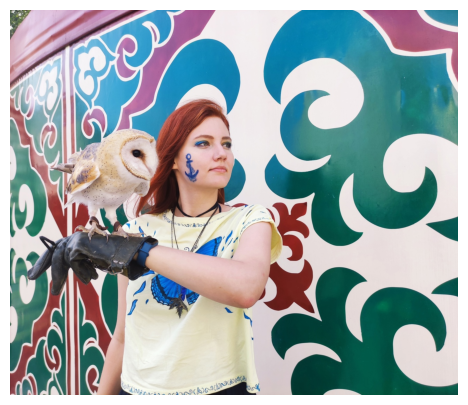

In [868]:
new_image = cv2.merge([red_color, green_color, blue_color]) #принимает нормально, как RGB
plt.figure(figsize=(7, 5))
plt.axis('off')
plt.imshow(new_image)
plt.show()

In [869]:
new_image

array([[[0.29803922, 0.37254902, 0.25490196],
        [0.29411765, 0.36862745, 0.25882353],
        [0.30980392, 0.36470588, 0.2745098 ],
        ...,
        [0.13333333, 0.47843137, 0.56470588],
        [0.12941176, 0.4745098 , 0.56078431],
        [0.1254902 , 0.47058824, 0.55686275]],

       [[0.33333333, 0.40784314, 0.29019608],
        [0.29803922, 0.36078431, 0.25490196],
        [0.32941176, 0.38431373, 0.29411765],
        ...,
        [0.14509804, 0.49019608, 0.57647059],
        [0.14117647, 0.48627451, 0.57254902],
        [0.14117647, 0.48627451, 0.57254902]],

       [[0.3254902 , 0.4       , 0.28235294],
        [0.35686275, 0.41960784, 0.31372549],
        [0.37254902, 0.42745098, 0.3372549 ],
        ...,
        [0.14117647, 0.48627451, 0.56470588],
        [0.14117647, 0.48627451, 0.56470588],
        [0.14509804, 0.49019608, 0.56862745]],

       ...,

       [[0.54901961, 0.31372549, 0.34509804],
        [0.5372549 , 0.31372549, 0.34117647],
        [0.56078431, 0

In [766]:
new_image.shape

(1100, 1280, 3)

In [797]:
len(new_image)

1100

###### a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.

In [781]:
X.shape #140800 строк (пикселей), 3 столбца (красный синий голубой)

(1408000, 3)

In [782]:
#2 кластера
kmeans = KMeans(n_clusters=2, random_state=42)
labels_clast = kmeans.fit_predict(X)
labels_clast = pd.Series(labels_clast, name='clusters')

C:\Users\Алехандро\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [783]:
labels_clast

0          1
1          1
2          1
3          1
4          1
          ..
1407995    1
1407996    1
1407997    1
1407998    1
1407999    1
Name: clusters, Length: 1408000, dtype: int32

In [784]:
hsplit_ = np.hsplit(labels_clast, 1100) #разделила обратно на 1100 строк по 1280 значений в каждой

In [748]:
hsplit_

[0       1
 1       1
 2       1
 3       1
 4       1
        ..
 1275    1
 1276    1
 1277    1
 1278    1
 1279    1
 Name: clusters, Length: 1280, dtype: int32,
 1280    1
 1281    1
 1282    1
 1283    1
 1284    1
        ..
 2555    1
 2556    1
 2557    1
 2558    1
 2559    1
 Name: clusters, Length: 1280, dtype: int32,
 2560    1
 2561    1
 2562    1
 2563    1
 2564    1
        ..
 3835    1
 3836    1
 3837    1
 3838    1
 3839    1
 Name: clusters, Length: 1280, dtype: int32,
 3840    1
 3841    1
 3842    1
 3843    1
 3844    1
        ..
 5115    1
 5116    1
 5117    1
 5118    1
 5119    1
 Name: clusters, Length: 1280, dtype: int32,
 5120    1
 5121    1
 5122    1
 5123    0
 5124    0
        ..
 6395    1
 6396    1
 6397    1
 6398    1
 6399    1
 Name: clusters, Length: 1280, dtype: int32,
 6400    1
 6401    1
 6402    1
 6403    0
 6404    0
        ..
 7675    1
 7676    1
 7677    1
 7678    1
 7679    1
 Name: clusters, Length: 1280, dtype: int32,
 768

In [785]:
len(hsplit_)

1100

In [786]:
len(hsplit_[0])

1280

In [787]:
#надо соединить в один двумерный массив вместо 1100 одномерных массивов
new_color = np.array(hsplit_)
new_color

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 1]])

In [788]:
b = new_color.copy() #реверсну для красивого двухцветного рисунка. без этого отображаются темные цвета вместо светлых
#далее так не делаю
b[b==1] = -1
b[b==-1] = 0
b

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

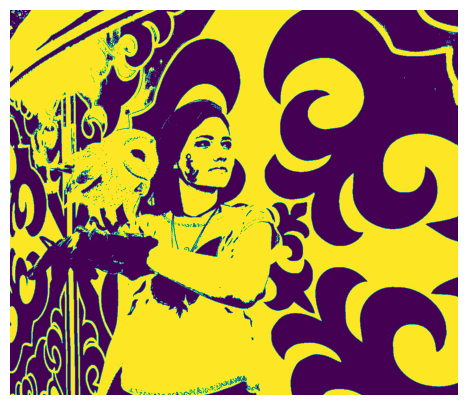

In [789]:
image_k_means_2_cl = cv2.merge([b]) #принимает почему-то нормально, как RGB
plt.figure(figsize=(7, 5))
plt.axis('off')
plt.imshow(image_k_means_2_cl)
plt.show()

In [683]:
image_k_means_2_cl.shape

(1100, 1280)

In [900]:
#5 кластеров
kmeans = KMeans(n_clusters=5, random_state=42)
labels_clast = kmeans.fit_predict(X)
labels_clast = pd.Series(labels_clast, name='clusters')

C:\Users\Алехандро\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [901]:
hsplit_ = np.hsplit(labels_clast, 1100) #разделила обратно на 1100 строк по 1280 значений в каждой

In [902]:
#надо соединить в один двумерный массив вместо 1100 одномерных массивов
new_color = np.array(hsplit_)
new_color

array([[2, 2, 2, ..., 4, 4, 4],
       [2, 2, 2, ..., 4, 4, 4],
       [2, 2, 2, ..., 4, 4, 4],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 3, 3, ..., 1, 1, 1],
       [3, 3, 0, ..., 1, 1, 1]])

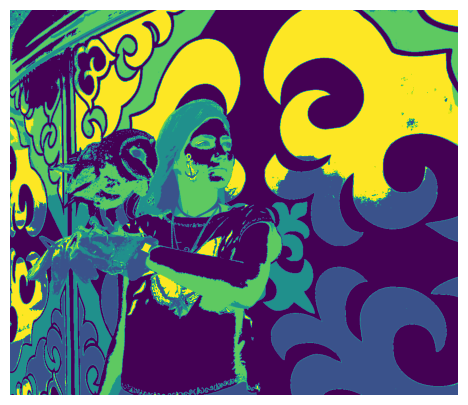

In [903]:
image_k_means_5_cl = cv2.merge([new_color]) #принимает почему-то нормально, как RGB
plt.figure(figsize=(7, 5))
plt.axis('off')
plt.imshow(image_k_means_5_cl)
plt.show()

In [907]:
#10 кластеров
kmeans = KMeans(n_clusters=10, random_state=42)
labels_clast = kmeans.fit_predict(X)
labels_clast = pd.Series(labels_clast, name='clusters')

C:\Users\Алехандро\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [908]:
hsplit_ = np.hsplit(labels_clast, 1100) #разделила обратно на 1100 строк по 1280 значений в каждой

In [909]:
#надо соединить в один двумерный массив вместо 1100 одномерных массивов
new_color = np.array(hsplit_)
new_color

array([[3, 3, 3, ..., 1, 1, 1],
       [1, 3, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [7, 7, 2, ..., 6, 6, 6],
       [7, 2, 9, ..., 6, 6, 6],
       [2, 9, 0, ..., 6, 6, 6]])

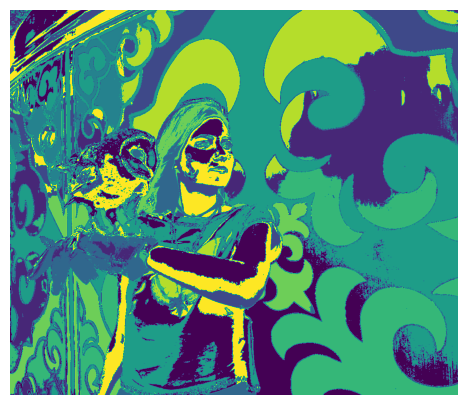

In [910]:
image_k_means_10_cl = cv2.merge([new_color]) #принимает почему-то нормально, как RGB
plt.figure(figsize=(7, 5))
plt.axis('off')
plt.imshow(image_k_means_10_cl)
plt.show()

In [914]:
#20 кластеров
kmeans = KMeans(n_clusters=20, random_state=42)
labels_clast = kmeans.fit_predict(X)
labels_clast = pd.Series(labels_clast, name='clusters')

C:\Users\Алехандро\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [915]:
hsplit_ = np.hsplit(labels_clast, 1100) #разделила обратно на 1100 строк по 1280 значений в каждой

In [916]:
#надо соединить в один двумерный массив вместо 1100 одномерных массивов
new_color = np.array(hsplit_)
new_color

array([[18, 18, 18, ..., 17, 17, 17],
       [18, 18, 18, ..., 17, 17, 17],
       [18, 18, 18, ..., 17, 17, 17],
       ...,
       [13, 13,  5, ..., 10, 10, 10],
       [13,  5, 16, ..., 10, 10, 10],
       [ 5, 16,  6, ..., 10, 10, 10]])

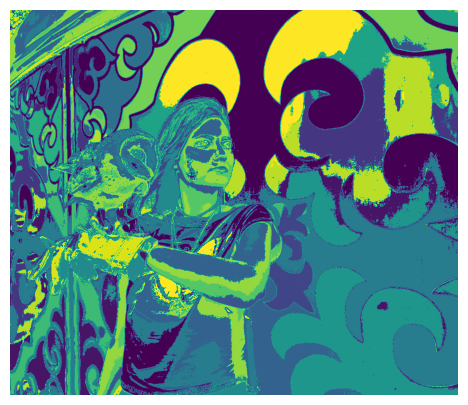

In [917]:
image_k_means_20_cl = cv2.merge([new_color]) 
plt.figure(figsize=(7, 5))
plt.axis('off')
plt.imshow(image_k_means_20_cl)
plt.show()

###### b) DBSCAN

In [929]:
img = cv2.imread('photo.jpg')

In [930]:
img = cv2.resize(img, (160, 128))

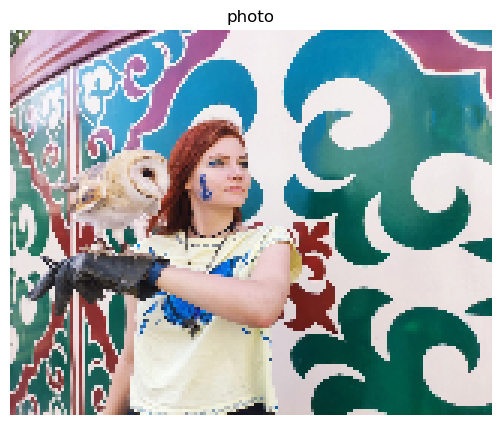

голубой [[141 229  69 ... 151 150 145]
 [ 92  92  94 ... 159 157 154]
 [ 94  70  74 ... 159 159 158]
 ...
 [ 62  75 125 ...  74  77  75]
 [ 71  84 110 ...  74  68  71]
 [ 81  90 114 ...  65  67  66]]
зеленый [[160 231  81 ... 127 127 124]
 [ 99 108 143 ... 132 132 129]
 [115 101  99 ... 132 134 133]
 ...
 [ 59  71 123 ...  95  96  93]
 [ 66  81 105 ...  91  84  84]
 [ 77  85 114 ...  78  79  77]]
красный [[154 223  75 ...  38  39  36]
 [ 84  93 128 ...  45  45  43]
 [ 97  80  82 ...  46  48  47]
 ...
 [128 143 105 ...  12  11   8]
 [136 150  80 ...   9   6  10]
 [139 148  94 ...   9   9  10]]
(128, 160)
[141 229  69  96 109 193  81 201 225 225 225 222 223 224 222 218 210 217
 215 211 201 201 196 196 207 221 213 182 150 112 106 111 141 178 191 190
 189 188 199 200 200 154  68  43  31  73 142 172 238 239 239 189 201 199
 194 197 218 179 194 183 245 241 153 150 150 146 146 144 144 143 142 138
 142 238 237 238 237 237 239 238 238 239 240 241 241 242 240 239 239 239
 237 236 235 236 235 236

In [932]:
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()
    print('голубой', b)
    print('зеленый', g)
    print('красный', r)
    print(b.shape)
    print(b[0])
    return new_image
     
    
new_image = draw_picture(img, 'photo')

In [619]:
X_rgb = cv2.split(img)
X_rgb

(array([[141, 229,  69, ..., 151, 150, 145],
        [ 92,  92,  94, ..., 159, 157, 154],
        [ 94,  70,  74, ..., 159, 159, 158],
        ...,
        [ 62,  75, 125, ...,  74,  77,  75],
        [ 71,  84, 110, ...,  74,  68,  71],
        [ 81,  90, 114, ...,  65,  67,  66]], dtype=uint8),
 array([[160, 231,  81, ..., 127, 127, 124],
        [ 99, 108, 143, ..., 132, 132, 129],
        [115, 101,  99, ..., 132, 134, 133],
        ...,
        [ 59,  71, 123, ...,  95,  96,  93],
        [ 66,  81, 105, ...,  91,  84,  84],
        [ 77,  85, 114, ...,  78,  79,  77]], dtype=uint8),
 array([[154, 223,  75, ...,  38,  39,  36],
        [ 84,  93, 128, ...,  45,  45,  43],
        [ 97,  80,  82, ...,  46,  48,  47],
        ...,
        [128, 143, 105, ...,  12,  11,   8],
        [136, 150,  80, ...,   9,   6,  10],
        [139, 148,  94, ...,   9,   9,  10]], dtype=uint8))

In [620]:
blue = np.array([])
blue

array([], dtype=float64)

In [621]:
for i in X_rgb[0]:
    blue = np.append(blue, i)
print(blue)

[141. 229.  69. ...  65.  67.  66.]


In [622]:
blue = blue.transpose()
blue

array([141., 229.,  69., ...,  65.,  67.,  66.])

In [623]:
green = np.array([])
green

array([], dtype=float64)

In [624]:
for i in X_rgb[1]:
    green = np.append(green, i)
print(green)

[160. 231.  81. ...  78.  79.  77.]


In [625]:
red = np.array([])
red

array([], dtype=float64)

In [626]:
for i in X_rgb[2]:
    red = np.append(red, i)
print(red)

[154. 223.  75. ...   9.   9.  10.]


In [627]:
X = np.row_stack([blue, green, red]).transpose() #каждый столбец - отдельный цвет
X

array([[141., 160., 154.],
       [229., 231., 223.],
       [ 69.,  81.,  75.],
       ...,
       [ 65.,  78.,   9.],
       [ 67.,  79.,   9.],
       [ 66.,  77.,  10.]])

In [628]:
X.shape

(20480, 3)

In [629]:
X

array([[141., 160., 154.],
       [229., 231., 223.],
       [ 69.,  81.,  75.],
       ...,
       [ 65.,  78.,   9.],
       [ 67.,  79.,   9.],
       [ 66.,  77.,  10.]])

In [630]:
dbscan = DBSCAN(eps=2, min_samples=1)
labels_clast = dbscan.fit_predict(X)
labels_clast = pd.Series(labels_clast)

In [ ]:
#здесь стандартизация не нужна

In [631]:
labels_clast

0           0
1           1
2           2
3           3
4           4
         ... 
20475    5911
20476    5911
20477    2897
20478    2897
20479    2897
Length: 20480, dtype: int64

In [632]:
hsplit_ = np.hsplit(labels_clast, 128) #разделила обратно на 1100 строк по 1280 значений в каждой

In [633]:
#надо соединить в один двумерный массив вместо 1100 одномерных массивов
new_color = np.array(hsplit_)
new_color

array([[   0,    1,    2, ...,   79,   79,   80],
       [  81,   82,   83, ...,   77,   77,   78],
       [ 134,  135,  136, ...,   77,   77,   77],
       ...,
       [5768, 5769, 5770, ..., 5808, 5809, 5810],
       [5776, 1658, 5811, ..., 5857, 2897, 2897],
       [5858, 5859, 5860, ..., 2897, 2897, 2897]], dtype=int64)

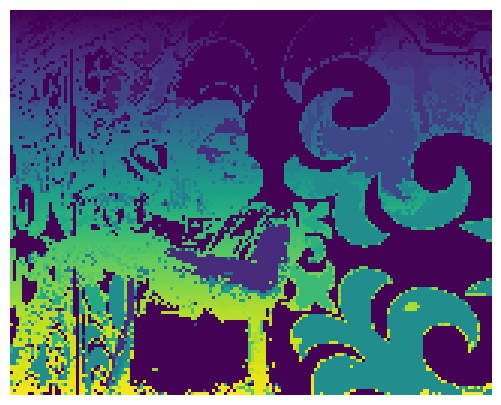

In [634]:
image_DBSCAN = cv2.merge([new_color]) #принимает почему-то нормально, как RGB
plt.figure(figsize=(7, 5))
plt.axis('off')
plt.imshow(image_DBSCAN)
plt.show()

###### c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

In [970]:
img = cv2.imread('photo.jpg')

In [971]:
img = cv2.resize(img, (80,64))

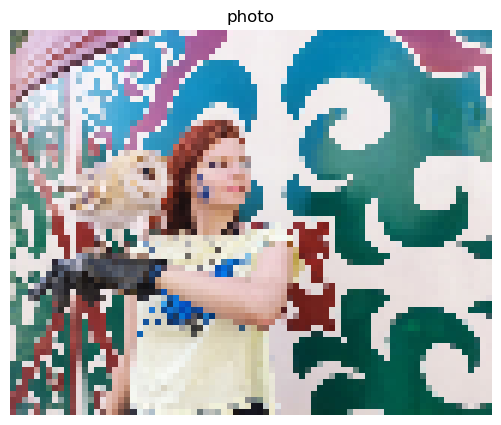

голубой [[ 95 106  68 ... 163 157 152]
 [ 93  81 110 ... 169 164 159]
 [108 104 222 ... 234 183 163]
 ...
 [ 60  65 154 ... 217 219 218]
 [ 63  92 110 ... 202  90  77]
 [ 77 118 117 ...  65  69  69]]
зеленый [[100 124  89 ... 135 130 128]
 [116 108 123 ... 141 138 133]
 [116 133 203 ... 237 171 143]
 ...
 [ 57  61 151 ... 217 220 220]
 [ 57  92 104 ... 201  99  94]
 [ 69 116 115 ...  82  85  82]]
красный [[ 90 117  80 ...  48  40  40]
 [ 98  93 134 ...  54  52  48]
 [101 134 225 ... 242 149  77]
 ...
 [128 134 146 ... 229 230 230]
 [128  59  58 ... 206  62  18]
 [140  84  70 ...   9   8   8]]
(64, 80)
[ 95 106  68 201 228 221 224 224 219 211 201 198 227 134 107 120 188 190
 198 198 103  32 143 196 242 205 205 197 236 247 238 155 150 148 145 142
 243 239 239 239 240 242 243 240 238 238 235 235 236 235 234 176 177 177
 177 177 174 174 173 172 172 176 240 235 131 136 129 131 129 126 126 124
 129 236 164 165 162 163 157 152]


In [972]:
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()
    print('голубой', b)
    print('зеленый', g)
    print('красный', r)
    print(b.shape)
    print(b[0])
    return new_image
     
    
new_image = draw_picture(img, 'photo')

In [973]:
X_rgb = cv2.split(img)
X_rgb

(array([[ 95, 106,  68, ..., 163, 157, 152],
        [ 93,  81, 110, ..., 169, 164, 159],
        [108, 104, 222, ..., 234, 183, 163],
        ...,
        [ 60,  65, 154, ..., 217, 219, 218],
        [ 63,  92, 110, ..., 202,  90,  77],
        [ 77, 118, 117, ...,  65,  69,  69]], dtype=uint8),
 array([[100, 124,  89, ..., 135, 130, 128],
        [116, 108, 123, ..., 141, 138, 133],
        [116, 133, 203, ..., 237, 171, 143],
        ...,
        [ 57,  61, 151, ..., 217, 220, 220],
        [ 57,  92, 104, ..., 201,  99,  94],
        [ 69, 116, 115, ...,  82,  85,  82]], dtype=uint8),
 array([[ 90, 117,  80, ...,  48,  40,  40],
        [ 98,  93, 134, ...,  54,  52,  48],
        [101, 134, 225, ..., 242, 149,  77],
        ...,
        [128, 134, 146, ..., 229, 230, 230],
        [128,  59,  58, ..., 206,  62,  18],
        [140,  84,  70, ...,   9,   8,   8]], dtype=uint8))

In [974]:
blue = np.array([])
blue

array([], dtype=float64)

In [975]:
for i in X_rgb[0]:
    blue = np.append(blue, i)
print(blue)

[ 95. 106.  68. ...  65.  69.  69.]


In [976]:
blue = blue.transpose()
blue

array([ 95., 106.,  68., ...,  65.,  69.,  69.])

In [977]:
green = np.array([])
green

array([], dtype=float64)

In [978]:
for i in X_rgb[1]:
    green = np.append(green, i)
print(green)

[100. 124.  89. ...  82.  85.  82.]


In [979]:
red = np.array([])
red

array([], dtype=float64)

In [980]:
for i in X_rgb[2]:
    red = np.append(red, i)
print(red)

[ 90. 117.  80. ...   9.   8.   8.]


In [981]:
X = np.row_stack([blue, green, red]).transpose() #каждый столбец - отдельный цвет
X

array([[ 95., 100.,  90.],
       [106., 124., 117.],
       [ 68.,  89.,  80.],
       ...,
       [ 65.,  82.,   9.],
       [ 69.,  85.,   8.],
       [ 69.,  82.,   8.]])

In [982]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.33609959, 0.36016949, 0.35433071],
       [0.38174274, 0.46186441, 0.46062992],
       [0.22406639, 0.31355932, 0.31496063],
       ...,
       [0.21161826, 0.28389831, 0.03543307],
       [0.22821577, 0.29661017, 0.03149606],
       [0.22821577, 0.28389831, 0.03149606]])

In [ ]:
#отрисую обратно для SSIM

In [1011]:
hsplit_ = np.hsplit(X[:,0], 64) #разделила обратно на 1100 строк по 1280 значений в каждой

In [1012]:
red_color = np.array(hsplit_)
red_color

array([[0.33609959, 0.38174274, 0.22406639, ..., 0.61825726, 0.593361  ,
        0.57261411],
       [0.32780083, 0.2780083 , 0.39834025, ..., 0.64315353, 0.62240664,
        0.60165975],
       [0.39004149, 0.37344398, 0.86307054, ..., 0.91286307, 0.70124481,
        0.61825726],
       ...,
       [0.19087137, 0.21161826, 0.58091286, ..., 0.84232365, 0.85062241,
        0.84647303],
       [0.2033195 , 0.32365145, 0.39834025, ..., 0.78008299, 0.3153527 ,
        0.26141079],
       [0.26141079, 0.43153527, 0.42738589, ..., 0.21161826, 0.22821577,
        0.22821577]])

In [1013]:
hsplit_ = np.hsplit(X[:,1], 64) #разделила обратно на 1100 строк по 1280 значений в каждой

In [1014]:
green_color = np.array(hsplit_)
green_color

array([[0.36016949, 0.46186441, 0.31355932, ..., 0.50847458, 0.48728814,
        0.47881356],
       [0.4279661 , 0.3940678 , 0.45762712, ..., 0.53389831, 0.52118644,
        0.5       ],
       [0.4279661 , 0.5       , 0.79661017, ..., 0.94067797, 0.66101695,
        0.54237288],
       ...,
       [0.1779661 , 0.19491525, 0.57627119, ..., 0.8559322 , 0.86864407,
        0.86864407],
       [0.1779661 , 0.32627119, 0.37711864, ..., 0.78813559, 0.3559322 ,
        0.33474576],
       [0.22881356, 0.4279661 , 0.42372881, ..., 0.28389831, 0.29661017,
        0.28389831]])

In [1015]:
hsplit_ = np.hsplit(X[:,2], 64) #разделила обратно на 1100 строк по 1280 значений в каждой

In [1016]:
blue_color = np.array(hsplit_)
blue_color

array([[0.35433071, 0.46062992, 0.31496063, ..., 0.18897638, 0.15748031,
        0.15748031],
       [0.38582677, 0.36614173, 0.52755906, ..., 0.21259843, 0.20472441,
        0.18897638],
       [0.3976378 , 0.52755906, 0.88582677, ..., 0.95275591, 0.58661417,
        0.30314961],
       ...,
       [0.50393701, 0.52755906, 0.57480315, ..., 0.9015748 , 0.90551181,
        0.90551181],
       [0.50393701, 0.23228346, 0.22834646, ..., 0.81102362, 0.24409449,
        0.07086614],
       [0.5511811 , 0.33070866, 0.27559055, ..., 0.03543307, 0.03149606,
        0.03149606]])

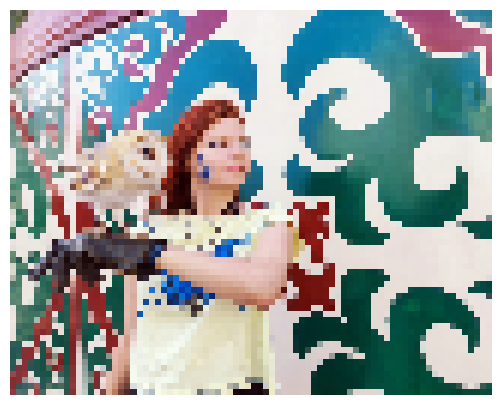

In [1020]:
new_image = cv2.merge([blue_color, green_color, red_color])
plt.figure(figsize=(7, 5))
plt.axis('off')
plt.imshow(new_image)
plt.show()

In [983]:
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

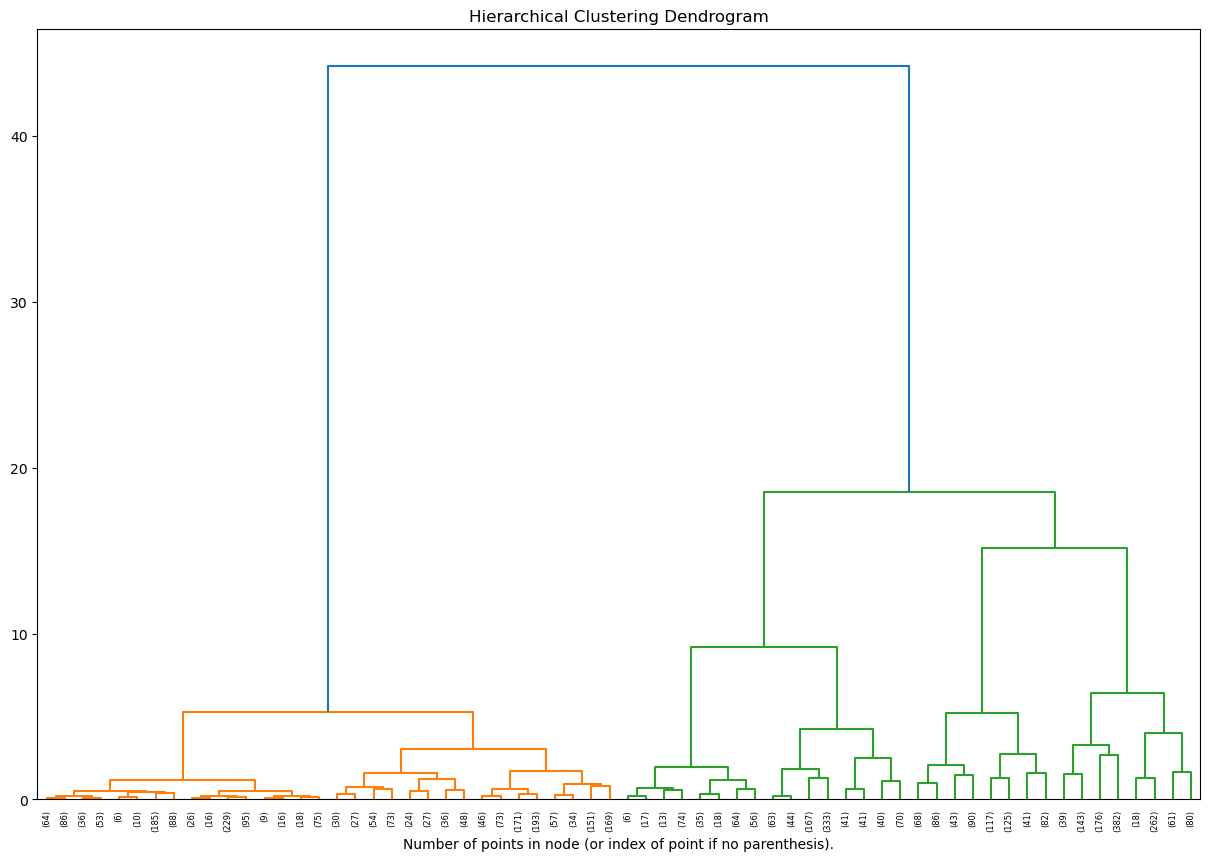

In [984]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram

plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
#cудя по визуализации, хорошее число кластеров 2. но сделаем по заданию

In [985]:
#2 кластера
aggl = AgglomerativeClustering(n_clusters=2)
labels_clast = aggl.fit_predict(X)
labels_clast = pd.Series(labels_clast)

In [986]:
hsplit_ = np.hsplit(labels_clast, 64) #разделила обратно на 1100 строк по 1280 значений в каждой

In [987]:
#надо соединить в один двумерный массив вместо 1100 одномерных массивов
new_color = np.array(hsplit_)
new_color

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

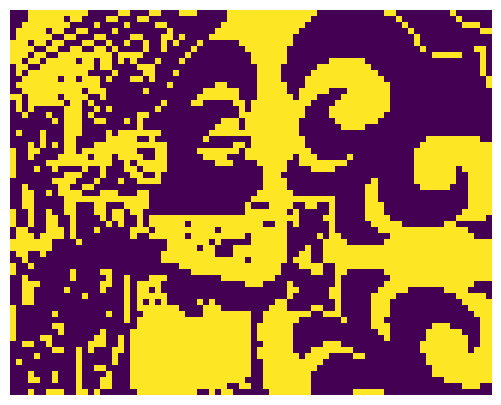

In [988]:
image_Agglomerative_2_cl = cv2.merge([new_color]) #принимает почему-то нормально, как RGB
plt.figure(figsize=(7, 5))
plt.axis('off')
plt.imshow(image_Agglomerative_2_cl)
plt.show()

In [1029]:
#5 кластеров
aggl = AgglomerativeClustering(n_clusters=5)
labels_clast = aggl.fit_predict(X)
labels_clast = pd.Series(labels_clast)

In [1030]:
hsplit_ = np.hsplit(labels_clast, 64)

In [1031]:
#надо соединить в один двумерный массив вместо 1100 одномерных массивов
new_color = np.array(hsplit_)
new_color

array([[0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 3, 0],
       ...,
       [4, 4, 3, ..., 1, 1, 1],
       [4, 0, 0, ..., 1, 0, 2],
       [4, 0, 0, ..., 2, 2, 2]], dtype=int64)

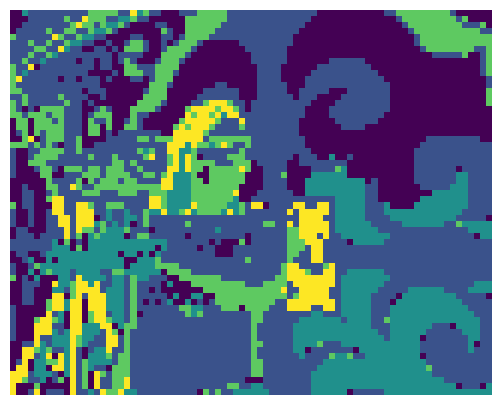

In [1032]:
image_Agglomerative_5_cl = cv2.merge([new_color]) #принимает почему-то нормально, как RGB
plt.figure(figsize=(7, 5))
plt.axis('off')
plt.imshow(image_Agglomerative_5_cl)
plt.show()

In [993]:
#10 кластеров
aggl = AgglomerativeClustering(n_clusters=10)
labels_clast = aggl.fit_predict(X)
labels_clast = pd.Series(labels_clast)

In [994]:
hsplit_ = np.hsplit(labels_clast, 64)

In [995]:
#надо соединить в один двумерный массив вместо 1100 одномерных массивов
new_color = np.array(hsplit_)
new_color

array([[0, 0, 3, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 6, 2, 0],
       ...,
       [4, 4, 2, ..., 1, 1, 1],
       [4, 0, 0, ..., 1, 0, 8],
       [4, 0, 0, ..., 8, 8, 8]], dtype=int64)

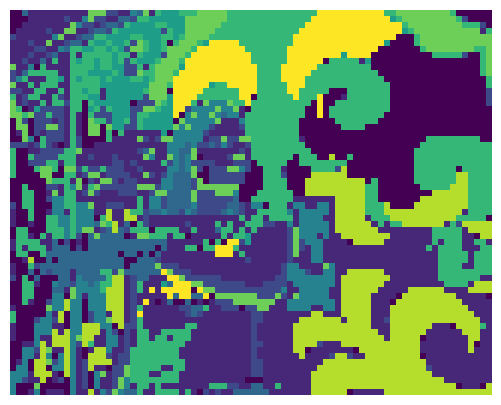

In [996]:
image_Agglomerative_10_cl = cv2.merge([new_color]) #принимает почему-то нормально, как RGB
plt.figure(figsize=(7, 5))
plt.axis('off')
plt.imshow(image_Agglomerative_10_cl)
plt.show()

In [997]:
#20 кластеров
aggl = AgglomerativeClustering(n_clusters=20)
labels_clast = aggl.fit_predict(X)
labels_clast = pd.Series(labels_clast)

In [998]:
hsplit_ = np.hsplit(labels_clast, 64)

In [999]:
#надо соединить в один двумерный массив вместо 1100 одномерных массивов
new_color = np.array(hsplit_)
new_color

array([[ 4,  4, 10, ...,  5,  5,  5],
       [ 4,  4,  4, ...,  5,  5,  5],
       [ 4,  4, 11, ...,  6,  1,  5],
       ...,
       [16, 16,  1, ..., 19, 19, 19],
       [16, 13, 18, ...,  2, 13,  8],
       [16,  4, 18, ...,  8,  8,  8]], dtype=int64)

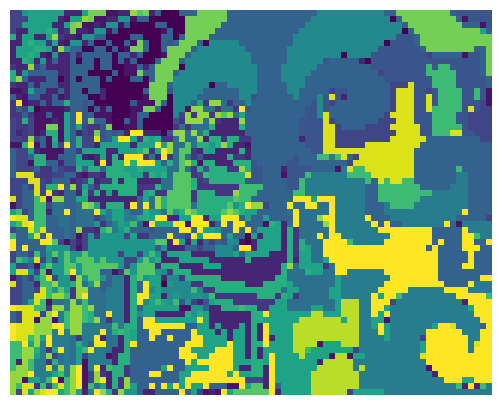

In [1000]:
image_Agglomerative_20_cl = cv2.merge([new_color]) #принимает почему-то нормально, как RGB
plt.figure(figsize=(7, 5))
plt.axis('off')
plt.imshow(image_Agglomerative_20_cl)
plt.show()

### 3. Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.

In [ ]:
#прогоняла с тем разрешением, которое использовалось для каждой конкретной модели. сюда не дублировала

In [873]:
new_image.shape

(1100, 1280, 3)

In [874]:
new_image = np.add.reduce(new_image, 2)
new_image.shape

(1100, 1280)

In [880]:
new_image

array([[0.9254902 , 0.92156863, 0.94901961, ..., 1.17647059, 1.16470588,
        1.15294118],
       [1.03137255, 0.91372549, 1.00784314, ..., 1.21176471, 1.2       ,
        1.2       ],
       [1.00784314, 1.09019608, 1.1372549 , ..., 1.19215686, 1.19215686,
        1.20392157],
       ...,
       [1.20784314, 1.19215686, 1.30196078, ..., 0.58039216, 0.58039216,
        0.58039216],
       [1.22745098, 1.48627451, 2.25882353, ..., 0.56862745, 0.57647059,
        0.57647059],
       [1.56862745, 2.24313725, 2.54117647, ..., 0.56862745, 0.56470588,
        0.57647059]])

In [891]:
new_image.max()

2.996078431372549

In [892]:
image_k_means_2_cl.max()

1

In [878]:
image_k_means_2_cl.shape

(1100, 1280)

In [881]:
image_k_means_2_cl

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]], dtype=int32)

SSIM для k-means

In [893]:
from skimage.metrics import structural_similarity as ssim
ssim(new_image, image_k_means_2_cl, channel_axis=1, data_range=3)

0.31401456039674935

In [904]:
image_k_means_5_cl.max()

4

In [905]:
ssim(new_image, image_k_means_5_cl, channel_axis=1,  data_range=4)

0.3167386481761839

In [912]:
image_k_means_10_cl.max()

9

In [913]:
ssim(new_image, image_k_means_10_cl, channel_axis=1, data_range=9)

0.4190755860236505

In [918]:
image_k_means_20_cl.max()

19

In [919]:
ssim(new_image, image_k_means_20_cl, channel_axis=1, data_range=19) #тут метрика упала

0.24136860799098492

SSIM для DBSCAN

In [920]:
image_DBSCAN

array([[   0,    1,    2, ...,   79,   79,   80],
       [  81,   82,   83, ...,   77,   77,   78],
       [ 134,  135,  136, ...,   77,   77,   77],
       ...,
       [5768, 5769, 5770, ..., 5808, 5809, 5810],
       [5776, 1658, 5811, ..., 5857, 2897, 2897],
       [5858, 5859, 5860, ..., 2897, 2897, 2897]], dtype=int32)

In [921]:
image_DBSCAN.shape

(128, 160)

In [937]:
image_DBSCAN.max()

5911

In [935]:
new_image.shape

(128, 160, 3)

In [936]:
new_image = np.add.reduce(new_image, 2)
new_image.shape

(128, 160)

In [938]:
new_image.max()

754

In [940]:
ssim(new_image, image_DBSCAN, channel_axis=1, data_range=5911)

0.06463111966201499

SSIM для AgglomerativeClustering

In [1021]:
new_image.shape

(64, 80, 3)

In [1022]:
new_image = np.add.reduce(new_image, 2)
new_image.shape

(64, 80)

In [1023]:
new_image.max()

2.9757773922327506

In [1024]:
image_Agglomerative_2_cl.shape

(64, 80)

In [1025]:
image_Agglomerative_2_cl.max()

1

In [1026]:
ssim(new_image, image_Agglomerative_2_cl, channel_axis=1, data_range=3)

0.30631018754266154

In [1027]:
image_Agglomerative_5_cl.max()

4

In [1033]:
ssim(new_image, image_Agglomerative_5_cl, channel_axis=1, data_range=4) #странный результат...

-0.041421031498592144

In [1034]:
image_Agglomerative_10_cl.max()

9

In [1035]:
ssim(new_image, image_Agglomerative_10_cl, channel_axis=1, data_range=9)

0.05182012615189933

In [1036]:
image_Agglomerative_20_cl.max()

19

In [1037]:
ssim(new_image, image_Agglomerative_20_cl, channel_axis=1, data_range=9)

0.07427833767679708

### 4. Сформулируйте выводы по проделанной работе.
###### a) Какая модель показала лучший результат?

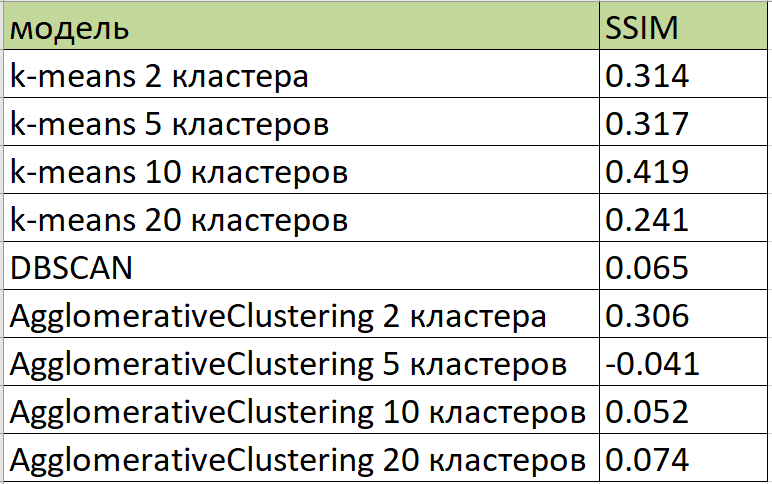

In [1039]:
from IPython.display import Image
Image('final.png') 

Визуально лучший результат показывает k-means. Это подтверждается и метрикой SSIM (0.419 с 10 кластерами).